Load the Dataset

In [1]:
ls


sample_data/


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/CNN1

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/CNN1'
/content


In [3]:
ls

sample_data/


In [4]:
pwd

'/content'

In [5]:
!unzip Flowers-Dataset.zip

unzip:  cannot find or open Flowers-Dataset.zip, Flowers-Dataset.zip.zip or Flowers-Dataset.zip.ZIP.


Image Augmentation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [ ]:
test_data = ImageDataGenerator(rescale= 1./255)

In [ ]:
x_train = train_data.flow_from_directory(r"/content/drive/MyDrive/Colab Notebooks/CNN1/flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 40)

Found 4317 images belonging to 5 classes.


In [ ]:
x_test = test_data.flow_from_directory(r"/content/drive/MyDrive/Colab Notebooks/CNN1/flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 40)

Found 4317 images belonging to 5 classes.


Creating CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()

Adding Layers

In [ ]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300, activation='relu'))

In [ ]:
model.add(Dense(300, activation='relu'))

In [ ]:
model.add(Dense(5, activation="softmax"))

Compile the Model

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

In [ ]:
len(x_train)

108

Fit the Model

In [ ]:
model.fit(x_train, epochs = 5, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/5
108/108 [==============================] - 51s 467ms/step - loss: 1.4033 - accuracy: 0.4383 - val_loss: 1.0875 - val_accuracy: 0.5594
Epoch 2/5
108/108 [==============================] - 49s 451ms/step - loss: 1.0707 - accuracy: 0.5671 - val_loss: 1.0768 - val_accuracy: 0.5745
Epoch 3/5
108/108 [==============================] - 51s 474ms/step - loss: 0.9937 - accuracy: 0.6118 - val_loss: 1.0006 - val_accuracy: 0.6050
Epoch 4/5
108/108 [==============================] - 48s 448ms/step - loss: 0.9467 - accuracy: 0.6294 - val_loss: 0.9537 - val_accuracy: 0.6467
Epoch 5/5
108/108 [==============================] - 48s 444ms/step - loss: 0.8910 - accuracy: 0.6562 - val_loss: 0.8300 - val_accuracy: 0.6843


Save the Model

In [ ]:
model.save("flower.h5")

Test the Model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
 model = load_model("/content/drive/MyDrive/Colab Notebooks/CNN1/flower.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = image.load_img("/content/drive/MyDrive/Colab Notebooks/CNN1/flowers/sunflower/1485456230_58d8e45e88.jpg",target_size=(64,64))

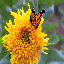

In [ ]:
img

In [ ]:
x = image.img_to_array(img)

In [ ]:
x

array([[[ 74., 108.,  31.],
        [ 77., 111.,  34.],
        [ 74., 107.,  28.],
        ...,
        [ 82., 116.,  40.],
        [ 80., 112.,  45.],
        [ 80., 112.,  49.]],

       [[ 77., 109.,  33.],
        [ 75., 112.,  32.],
        [ 74., 107.,  36.],
        ...,
        [ 78., 113.,  47.],
        [ 84., 104.,  51.],
        [ 89., 108.,  63.]],

       [[ 74., 107.,  38.],
        [ 74., 105.,  35.],
        [ 75., 109.,  35.],
        ...,
        [ 76., 102.,  55.],
        [ 77.,  92.,  73.],
        [ 88.,  97.,  76.]],

       ...,

       [[126., 150., 178.],
        [129., 160., 180.],
        [114., 146., 157.],
        ...,
        [ 87., 114., 107.],
        [ 93., 119., 110.],
        [ 92., 119., 110.]],

       [[134., 162., 186.],
        [111., 146., 165.],
        [110., 141., 144.],
        ...,
        [100., 127., 138.],
        [109., 132., 146.],
        [110., 138., 149.]],

       [[116., 146., 156.],
        [ 98., 133., 135.],
        [ 96., 1

In [ ]:
x.ndim

3

In [ ]:
x = np.expand_dims(x,axis = 0)

In [ ]:
x.ndim

4

In [ ]:
pred = model.predict(x)

In [ ]:
pred

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
labels=["Daisy","Dandalion","Rose","Sunflower","Tulip"]

In [ ]:
np.argmax(pred)

3

In [ ]:
labels[np.argmax(pred)]

'Sunflower'